<a href="https://colab.research.google.com/github/DimitryMo/NSD/blob/master/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
import nltk
#nltk.download()

In [5]:
import sys
import csv
csv.field_size_limit(sys.maxsize)

131072

In [6]:
data = pd.read_csv("allhabr.csv", delimiter=',', engine='python', encoding='utf-8', error_bad_lines=False)

In [7]:
filik = data
filik

,Unnamed: 0,title,text,date,hubs,tags,votes,views,bookmarks,comments
0,0,Психологическая обусловленность возникновения ...,Видимо вспышки на солнце в том числе послуж...,2014-01,Разработка веб-сайтов,Web 3.0 психология социальные сети носимая эле...,-3.0,6600.0,10.0,"Думаю, всем нам известно, что это будут за час..."
1,1,Обзор трафарет+блокнот для прототипирования,Некоторое время были у меня в руках предметы ...,2014-01,Интерфейсы,prototype прототип prototyping прототипировани...,35.0,38400.0,124.0,Где можно такой заказать?~#www.uistencils.com/...
2,2,Хранилище данных уровня SOHO из картона,Потребность в хранилище данных у меня возник...,2014-01,DIY или Сделай сам,diy или сделай сам хранение данных хранилище д...,-11.0,13700.0,12.0,Тему переименовать — Как собрать скворечник.\n...
3,3,Год большого рывка: краткие итоги 2013-го,год был годом новых базовых станций и н...,2014-01,Блог компании ВымпелКом (Билайн) Разработка си...,Сотовая связь сервис LTE Билайн Вымпелком 2013,20.0,14000.0,19.0,В москве и области функционал дозвона в режиме...
4,4,6 простых вопросов по C# с подвохом,Почитав простых задач на c с подвохом я ог...,2014-01,.NET,c# .net внезапно не делайте так никогда кровь ...,37.0,35800.0,204.0,"«Можно ли в C# „поковырять“ память, которую вы..."
...,...,...,...,...,...,...,...,...,...,...
49775,135946,Меню консольных команд на python,Приветствую Вас коллеги Меня зовут Рустам я...,2020-02,Python DevOps,python3 консоль,2.0,4400.0,51.0,"shell команды прописаны в конфиге, который пар..."
49776,135964,Срочные задачи. Да придёт Спаситель,Вы когда нибудь задумывались откуда берутся с...,2020-02,GTD Управление персоналом Читальный зал,черт знает что,32.0,10600.0,54.0,"TL;DR:\n«У каждой аварии есть имя, фамилия и д..."
49777,135980,"Жесты, которые радуют",Всем привет На прошлой неделе мы запустили...,2020-02,Блог компании Vivaldi Technologies AS Браузеры,vivaldi опрос жесты мышью браузер,3.0,1500.0,3.0,Сколько не хотел попробовать перейти на другой...
49778,135984,«Если сайты будут работать лучше — это будет и...,Совсем недавно вышла статья про новый инструме...,15:36-12,Блог компании JUG Ru Group Разработка веб-сайт...,heisenbug heisenbug2020piter heisenbug2020 pla...,17.0,900.0,7.0,"Если кому-то интересно, есть ли в Playwright о..."


In [8]:
filik.dropna(inplace=True)

In [9]:
dat = filik['text'] #создаем новую колонку, в которой все слова текста в нижнем регистре представлены в форме списка

bignew=[]
for i in dat:
    new = []
    for j in i.split():
        new.append(j.lower())
    bignew.append(new)
filik['textlower'] = bignew



In [10]:
filik['textlowerstring'] = filik['textlower'].apply(' '.join)

In [11]:
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/freezylex/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/freezylex/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from nltk.tokenize import word_tokenize

In [13]:
filik['texttok'] = filik.textlowerstring.apply(lambda x: word_tokenize(x))


In [14]:
nomorebadwords = []
from nltk.corpus import stopwords
stop_words = set(stopwords.words("russian"))
for j in filik['texttok']:
    smallbw = []
    for i in j:
        if i not in stop_words:
            smallbw.append(i)
    nomorebadwords.append(smallbw)
filik['textalmostdone'] = nomorebadwords

    

In [15]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()


In [16]:
def lemmatize(text):    #приводим в исходную форму слово
    res = list()
    for line in text:
        res1 = list()
        for word in line:
            p = morph.parse(word)[0]
            res1.append(p.normal_form)
        res.append(res1)

    return res

filik['done'] = lemmatize(filik['textalmostdone'])


In [17]:
filik['done']

0        [видимо, вспышка, солнце, число, послужить, пр...
1        [некоторый, время, рука, предмет, интересный, ...
2        [потребность, хранилище, дать, возникнуть, дов...
3        [год, год, новый, базовый, станция, новый, сер...
4        [почитать, простой, задача, c, подвох, огорчит...
                               ...                        
49775    [приветствовать, коллега, звать, рустам, работ...
49776    [задумываться, откуда, браться, срочный, задач...
49777    [весь, привет, прошлый, неделя, запустить, опр...
49778    [недавно, выйти, статья, новый, инструмент, pl...
49779    [продолжать, серия, стать, начаться, обзор, ре...
Name: done, Length: 44473, dtype: object

In [18]:
from gensim.corpora.dictionary import Dictionary

In [19]:
dictionary = Dictionary(filik['done'])

In [20]:
corpus = [dictionary.doc2bow(article) for article in filik['done']]

In [21]:
import collections
import itertools

total_word_count = collections.defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count

In [22]:
import collections
import itertools
l = []
for doc in corpus:
    bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)
    l1 = []
    for word_id, word_count in bow_doc:
        l1.append((dictionary.get(word_id), word_count))
    l.append(l1)
filik['countwords'] = l
filik

,Unnamed: 0,title,text,date,hubs,tags,votes,views,bookmarks,comments,textlower,textlowerstring,texttok,textalmostdone,done,countwords
0,0,Психологическая обусловленность возникновения ...,Видимо вспышки на солнце в том числе послуж...,2014-01,Разработка веб-сайтов,Web 3.0 психология социальные сети носимая эле...,-3.0,6600.0,10.0,"Думаю, всем нам известно, что это будут за час...","[видимо, вспышки, на, солнце, в, том, числе, п...",видимо вспышки на солнце в том числе послужили...,"[видимо, вспышки, на, солнце, в, том, числе, п...","[видимо, вспышки, солнце, числе, послужили, пр...","[видимо, вспышка, солнце, число, послужить, пр...","[(человек, 24), (это, 17), (потребность, 13), ..."
1,1,Обзор трафарет+блокнот для прототипирования,Некоторое время были у меня в руках предметы ...,2014-01,Интерфейсы,prototype прототип prototyping прототипировани...,35.0,38400.0,124.0,Где можно такой заказать?~#www.uistencils.com/...,"[некоторое, время, были, у, меня, в, руках, пр...",некоторое время были у меня в руках предметы и...,"[некоторое, время, были, у, меня, в, руках, пр...","[некоторое, время, руках, предметы, интересные...","[некоторый, время, рука, предмет, интересный, ...","[(трафарет, 16), (блокнот, 9), (программа, 5),..."
2,2,Хранилище данных уровня SOHO из картона,Потребность в хранилище данных у меня возник...,2014-01,DIY или Сделай сам,diy или сделай сам хранение данных хранилище д...,-11.0,13700.0,12.0,Тему переименовать — Как собрать скворечник.\n...,"[потребность, в, хранилище, данных, у, меня, в...",потребность в хранилище данных у меня возникла...,"[потребность, в, хранилище, данных, у, меня, в...","[потребность, хранилище, данных, возникла, дов...","[потребность, хранилище, дать, возникнуть, дов...","[(хранилище, 8), (диск, 7), (довольно, 7), (сд..."
3,3,Год большого рывка: краткие итоги 2013-го,год был годом новых базовых станций и н...,2014-01,Блог компании ВымпелКом (Билайн) Разработка си...,Сотовая связь сервис LTE Билайн Вымпелком 2013,20.0,14000.0,19.0,В москве и области функционал дозвона в режиме...,"[год, был, годом, новых, базовых, станций, и, ...",год был годом новых базовых станций и новых се...,"[год, был, годом, новых, базовых, станций, и, ...","[год, годом, новых, базовых, станций, новых, с...","[год, год, новый, базовый, станция, новый, сер...","[(год, 15), (сеть, 14), (большой, 6), (один, 6..."
4,4,6 простых вопросов по C# с подвохом,Почитав простых задач на c с подвохом я ог...,2014-01,.NET,c# .net внезапно не делайте так никогда кровь ...,37.0,35800.0,204.0,"«Можно ли в C# „поковырять“ память, которую вы...","[почитав, простых, задач, на, c, с, подвохом, ...",почитав простых задач на c с подвохом я огорчи...,"[почитав, простых, задач, на, c, с, подвохом, ...","[почитав, простых, задач, c, подвохом, огорчил...","[почитать, простой, задача, c, подвох, огорчит...","[(f, 25), (static, 23), (color, 22), (mov, 20)..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49775,135946,Меню консольных команд на python,Приветствую Вас коллеги Меня зовут Рустам я...,2020-02,Python DevOps,python3 консоль,2.0,4400.0,51.0,"shell команды прописаны в конфиге, который пар...","[приветствую, вас, коллеги, меня, зовут, руста...",приветствую вас коллеги меня зовут рустам я ра...,"[приветствую, вас, коллеги, меня, зовут, руста...","[приветствую, коллеги, зовут, рустам, работаю,...","[приветствовать, коллега, звать, рустам, работ...","[(пункт, 6), (приложение, 5), (контейнер, 5), ..."
49776,135964,Срочные задачи. Да придёт Спаситель,Вы когда нибудь задумывались откуда берутся с...,2020-02,GTD Управление персоналом Читальный зал,черт знает что,32.0,10600.0,54.0,"TL;DR:\n«У каждой аварии есть имя, фамилия и д...","[вы, когда, нибудь, задумывались, откуда, беру...",вы когда нибудь задумывались откуда берутся ср...,"[вы, когда, нибудь, задумывались, откуда, беру...","[задумывались, откуда, берутся, срочные, задач...","[задумываться, откуда, браться, срочный, задач...","[(задача, 22), (срочный, 14), (директор, 7),

In [23]:
from gensim.models.tfidfmodel import TfidfModel

tfidf = TfidfModel(corpus)
tfidf_weights = tfidf[doc]
sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)
#for term_id, weight in sorted_tfidf_weights[:]:
#    print(dictionary.get(term_id), weight)

In [24]:
L2=[]
for doc in corpus:
    l2=[]
    tfidf_weights = tfidf[doc]
    sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)
    for term_id, weight in sorted_tfidf_weights[:]:
        l2.append((dictionary.get(term_id), weight))
    L2.append(l2)
filik['weightwords'] = L2

In [25]:
'''
#так, теперь давайте проделаем это для тэгов
df_tags=pd.DataFrame()
dat1 = filik['tags'] #создаем новую колонку, в которой все слова текста в нижнем регистре представлены в форме списка

bignew1=[]
for i in dat1:
    new1 = []
    for j in i.split():
        new1.append(j.lower())
    bignew1.append(new1)
df_tags['tagslower'] = bignew1

df_tags['tagslowerstring'] = df_tags['tagslower'].apply(' '.join)

df_tags['tagstok'] = df_tags.tagslowerstring.apply(lambda x: word_tokenize(x))

nomorebadwords1 = []
from nltk.corpus import stopwords
#stop_words = set(stopwords.words("russian"))
for j in df_tags['tagstok']:
    smallbw1 = []
    for i in j:
        if i not in stop_words:
            smallbw1.append(i)
    nomorebadwords1.append(smallbw1)
df_tags['tagsalmostdone'] = nomorebadwords1

df_tags['done'] = lemmatize(df_tags['tagsalmostdone'])

dictionary1 = Dictionary(df_tags['done'])
corpus1 = [dictionary1.doc2bow(article) for article in df_tags['done']]
total_word_count1 = collections.defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus1):
    total_word_count1[word_id] += word_count

l1 = []
for doc in corpus1:
    bow_doc1 = sorted(doc, key=lambda w: w[1], reverse=True)
    l12 = []
    for word_id, word_count in bow_doc1:
        l12.append((dictionary1.get(word_id), word_count))
    l1.append(l12)
df_tags['countwords'] = l1
df_tags
'''

'\n#так, теперь давайте проделаем это для тэгов\ndf_tags=pd.DataFrame()\ndat1 = filik[\'tags\'] #создаем новую колонку, в которой все слова текста в нижнем регистре представлены в форме списка\n\nbignew1=[]\nfor i in dat1:\n    new1 = []\n    for j in i.split():\n        new1.append(j.lower())\n    bignew1.append(new1)\ndf_tags[\'tagslower\'] = bignew1\n\ndf_tags[\'tagslowerstring\'] = df_tags[\'tagslower\'].apply(\' \'.join)\n\ndf_tags[\'tagstok\'] = df_tags.tagslowerstring.apply(lambda x: word_tokenize(x))\n\nnomorebadwords1 = []\nfrom nltk.corpus import stopwords\n#stop_words = set(stopwords.words("russian"))\nfor j in df_tags[\'tagstok\']:\n    smallbw1 = []\n    for i in j:\n        if i not in stop_words:\n            smallbw1.append(i)\n    nomorebadwords1.append(smallbw1)\ndf_tags[\'tagsalmostdone\'] = nomorebadwords1\n\ndf_tags[\'done\'] = lemmatize(df_tags[\'tagsalmostdone\'])\n\ndictionary1 = Dictionary(df_tags[\'done\'])\ncorpus1 = [dictionary1.doc2bow(article) for article 

In [26]:
'''
#теперь для хабов
df_hubs=pd.DataFrame()
dat2 = filik['hubs'] #создаем новую колонку, в которой все слова текста в нижнем регистре представлены в форме списка

bignew2=[]
for i in dat2:
    new2 = []
    for j in i.split():
        new2.append(j.lower())
    bignew2.append(new2)
df_hubs['hubslower'] = bignew2

df_hubs['hubslowerstring'] = df_hubs['hubslower'].apply(' '.join)

df_hubs['hubstok'] = df_hubs.hubslowerstring.apply(lambda x: word_tokenize(x))

nomorebadwords2 = []
from nltk.corpus import stopwords
#stop_words = set(stopwords.words("russian"))
for j in df_hubs['hubstok']:
    smallbw2 = []
    for i in j:
        if i not in stop_words:
            smallbw2.append(i)
    nomorebadwords2.append(smallbw2)
df_hubs['hubsalmostdone'] = nomorebadwords2

df_hubs['done'] = lemmatize(df_hubs['hubsalmostdone'])

dictionary2 = Dictionary(df_hubs['done'])
corpus2 = [dictionary2.doc2bow(article) for article in df_hubs['done']]
total_word_count2 = collections.defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus2):
    total_word_count2[word_id] += word_count

l2 = []
for doc in corpus2:
    bow_doc2 = sorted(doc, key=lambda w: w[1], reverse=True)
    l13 = []
    for word_id, word_count in bow_doc2:
        l13.append((dictionary2.get(word_id), word_count))
    l2.append(l13)
df_hubs['countwords'] = l2
df_hubs
'''

'\n#теперь для хабов\ndf_hubs=pd.DataFrame()\ndat2 = filik[\'hubs\'] #создаем новую колонку, в которой все слова текста в нижнем регистре представлены в форме списка\n\nbignew2=[]\nfor i in dat2:\n    new2 = []\n    for j in i.split():\n        new2.append(j.lower())\n    bignew2.append(new2)\ndf_hubs[\'hubslower\'] = bignew2\n\ndf_hubs[\'hubslowerstring\'] = df_hubs[\'hubslower\'].apply(\' \'.join)\n\ndf_hubs[\'hubstok\'] = df_hubs.hubslowerstring.apply(lambda x: word_tokenize(x))\n\nnomorebadwords2 = []\nfrom nltk.corpus import stopwords\n#stop_words = set(stopwords.words("russian"))\nfor j in df_hubs[\'hubstok\']:\n    smallbw2 = []\n    for i in j:\n        if i not in stop_words:\n            smallbw2.append(i)\n    nomorebadwords2.append(smallbw2)\ndf_hubs[\'hubsalmostdone\'] = nomorebadwords2\n\ndf_hubs[\'done\'] = lemmatize(df_hubs[\'hubsalmostdone\'])\n\ndictionary2 = Dictionary(df_hubs[\'done\'])\ncorpus2 = [dictionary2.doc2bow(article) for article in df_hubs[\'done\']]\ntota

In [27]:
final = pd.DataFrame()
#final['hubsdone'] = df_hubs['done']
#final['hubscounted'] = df_hubs['countwords']
#final['tagsdone'] = df_tags['done']
#final['tagscounted'] = df_tags['countwords']
final['textdone'] = filik['done']
final['textcounted'] = filik['countwords']
final['weightwords'] = filik['weightwords']
#разобьем по годам
#list_date = []
#for date in filik['date']:
#    new_date = date.split('-')
#    date = new_date[0]
#    list_date.append(date)
#filik['date'] = list_date
final['date'] = filik['date']

In [159]:
final

,textdone,textcounted,weightwords,date
0,"[видимо, вспышка, солнце, число, послужить, пр...","[(человек, 24), (это, 17), (потребность, 13), ...","[(психика, 0.3220140636351013), (потребность, ...",2014-01
1,"[некоторый, время, рука, предмет, интересный, ...","[(трафарет, 16), (блокнот, 9), (программа, 5),...","[(трафарет, 0.7565935813732), (блокнот, 0.3021...",2014-01
2,"[потребность, хранилище, дать, возникнуть, дов...","[(хранилище, 8), (диск, 7), (довольно, 7), (сд...","[(двп, 0.5401016423890727), (хранилище, 0.2773...",2014-01
3,"[год, год, новый, базовый, станция, новый, сер...","[(год, 15), (сеть, 14), (большой, 6), (один, 6...","[(lte, 0.3400347745181987), (абонент, 0.246965...",2014-01
4,"[почитать, простой, задача, c, подвох, огорчит...","[(f, 25), (static, 23), (color, 22), (mov, 20)...","[(ebp, 0.3054363557114085), (mov, 0.2716882192...",2014-01
...,...,...,...,...
49775,"[приветствовать, коллега, звать, рустам, работ...","[(пункт, 6), (приложение, 5), (контейнер, 5), ...","[(env, 0.32422003312931674), (девелопа, 0.3073...",2020-02
49776,"[задумываться, откуда, браться, срочный, задач...","[(задача, 22), (срочный, 14), (директор, 7), (...","[(срочный, 0.5738969477301837), (срочность, 0....",2020-02
49777,"[весь, привет, прошлый, неделя, запустить, опр...","[(жест, 6), (результат, 5), (мыший, 5), (работ...","[(жест, 0.504951841791985), (мыший, 0.47941353...",2020-02
49778,"[недавно, выйти, статья, новый, инструмент, pl...","[(playwright, 48), (браузер, 37), (это, 35), (...","[(playwright, 0.780832156011007), (puppeteer, ...",15:36-12


In [222]:
udalit = ['2006-06', '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06', '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-10', '2011-12', '2012-01', '2012-02', '2012-03', '2012-05', '2012-07', '2012-08', '2012-09', '2013-01', '2013-02', '2013-03', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '09:17-12', '15:36-12']
list_k_udaleniu = []
for index, row in final['date'].iteritems():
    for date in udalit:
        if row == date:
            list_k_udaleniu.append(index)
            #print(index, row)

for element in list_k_udaleniu:
    final.drop(element, inplace=True)


In [223]:
checklist = ['финансы','инвестиция', 'фонд', 'HFT', 'фьючерс', 'опцион', 'биржа', 'форекс', 'forex', 'брокер', 'финтех', 'fintech', 'листинг', 'котировка', 'акция', 'облигация', 'трейдинг', 'валюта', 'дивиденд', 'волатильность', 'RegTech', 'РЕПО', 'ETF', 'API', 'RPA', 'IPO', 'криптовалюта', 'bitcoin', 'ethereum', 'биткоин', 'ICO', 'NEM', 'ripple', 'litecoin', 'IOTA', 'DASH', 'BitShares', 'Stratis', 'Monero', 'Bytecoin', 'Zcash', 'NEO', 'QTUM', 'OmiseGO', 'BitCoinnect', 'BCC', 'Lisk', 'LSK', 'Cardano', 'ADA', 'Tether', 'USDT', 'Stellar Lumens', 'XLM', 'EOS', 'Hshare', 'HSR', 'Waves', 'альткойн', 'altcoin', 'Асик', 'блокчейн', 'фондовый', 'финтех-стартап', 'финтех-единорог', 'финтех-инвестиция', 'финтех-проект', 'инкубатор', 'акселератор', 'хакатон', 'lendtech', 'govtech', 'PSD2', 'финтех-продукт', 'маркетплейс', 'песочница']
final['textdone'].dropna(inplace=True)
my_list={}
import re
for index, row in final['textdone'].iteritems():
    string = ' '.join(map(str, row))
    for checkword in checklist:
        match = re.search(checkword, string)
        if match is not None:
            #my_list[checkword]=index
            if my_list.get(checkword) is None:
                my_list[checkword]=list()
                my_list[checkword].append(index)
            else:
                my_list[checkword].append(index)
#for checkword in checklist:
        #print(my_list[checkword])
#my_list

In [224]:
#словарь с ключом - датой и значением - веса слов из чеклиста в этом месяце
dict_weights = {}
for key in my_list.keys():
    for value in my_list[key]:
        rab_list = final['weightwords'][value]
        for tupl in rab_list:
            if tupl[0] == key:
                if final['date'][value] not in dict_weights.keys():
                    dict_weights[final['date'][value]]=list()
                    dict_weights[final['date'][value]].append(tupl[1])
                else:
                    dict_weights[final['date'][value]].append(tupl[1])
                #list_weights.append(tupl[1])
                #print(tupl[1], key, value)
#print(dict_weights)



In [225]:
import numpy as np

In [226]:
b = []
b_sred = []
for month in dict_weights.keys():
    a = np.array(dict_weights[month])
    b.append(a)
    b_sred.append(np.mean(a))
    #print(a)

In [227]:
#b_sred

In [228]:
#тут мы составляем словарь, в котором будут сохранены статьи, где наши слова весят больше 0.10
list_weights = []
dict_dates_numbers = {}
for key in my_list.keys():
    for value in my_list[key]:
        rab_list = final['weightwords'][value]
        for tupl in rab_list:
            if tupl[0] == key and tupl[1] > 0.1:
                if value not in dict_dates_numbers.keys():
                    dict_dates_numbers[value]=list()
                    dict_dates_numbers[value].append(tupl[1])
                else:
                    dict_dates_numbers[value].append(tupl[1])
#print(dict_dates_numbers)

In [229]:
#тут хранится лист с "нашими" статьями
nomera_nuzhnikh_stat = []
for articles in dict_dates_numbers.keys():
    nomera_nuzhnikh_stat.append(articles)


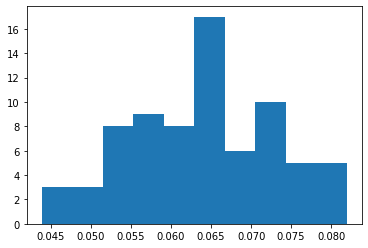

In [230]:
#чарт из средних весов по всем словам без ограничений на вес
plt.hist(b_sred)
plt.show()

In [231]:
#словарь с весами слов уже из наших статей
dict_weights1 = {}
for key in my_list.keys():
    for value in my_list[key]:
        rab_list = final['weightwords'][value]
        for tupl in rab_list:
            if tupl[0] == key and tupl[1] > 0.1:
                if final['date'][value] not in dict_weights1.keys():
                    dict_weights1[final['date'][value]]=list()
                    dict_weights1[final['date'][value]].append(tupl[1])
                else:
                    dict_weights1[final['date'][value]].append(tupl[1])
#print(dict_weights1)

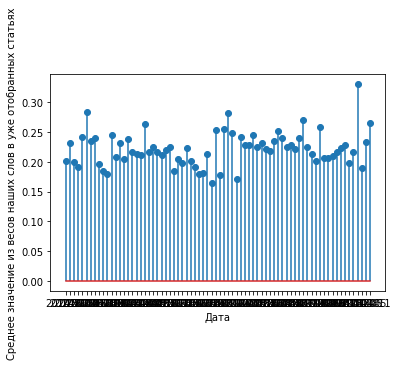

In [232]:
#sred_iz_nashich_statei = s_i_n_s
s_i_n_s = []
for month in dict_weights1.keys():
    a = np.array(dict_weights1[month])
    s_i_n_s.append(np.mean(a))
x = list(dict_weights1.keys())
y = s_i_n_s
plt.xlabel('Дата')
plt.ylabel('Среднее значение из весов наших слов в уже отобранных статьях')

plt.stem(x, y, use_line_collection=True)
plt.show()
# что получили: мы отобрали "предполагаемые статьи" и посчитали среднее значение
#из наших ключевых слов в них. В итоге получили что оно стабильно 0.2 - 0.25 что говорит о большой важности

In [233]:
#НОМЕРА НАШИХ СТАТЕЙ
len(sorted(nomera_nuzhnikh_stat))

1458

In [234]:
#список, в котором лайки наших статей
list_for_likes = []
for i in sorted(nomera_nuzhnikh_stat):
    list_for_likes.append(filik['votes'][i])


In [235]:
#список, который выдает среднее значение важных слов в нужных статьях
kl = [] 
for article in sorted(nomera_nuzhnikh_stat): 
    a = np.array(dict_dates_numbers[article]) 
    kl.append(np.mean(a)) 

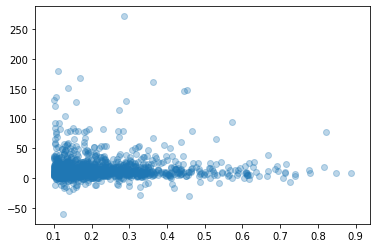

In [236]:
rng = np.random.RandomState(0)
x = kl
y = list_for_likes
colors = rng.rand(1315)

plt.scatter(x, y, cmap='viridis', alpha=0.3)

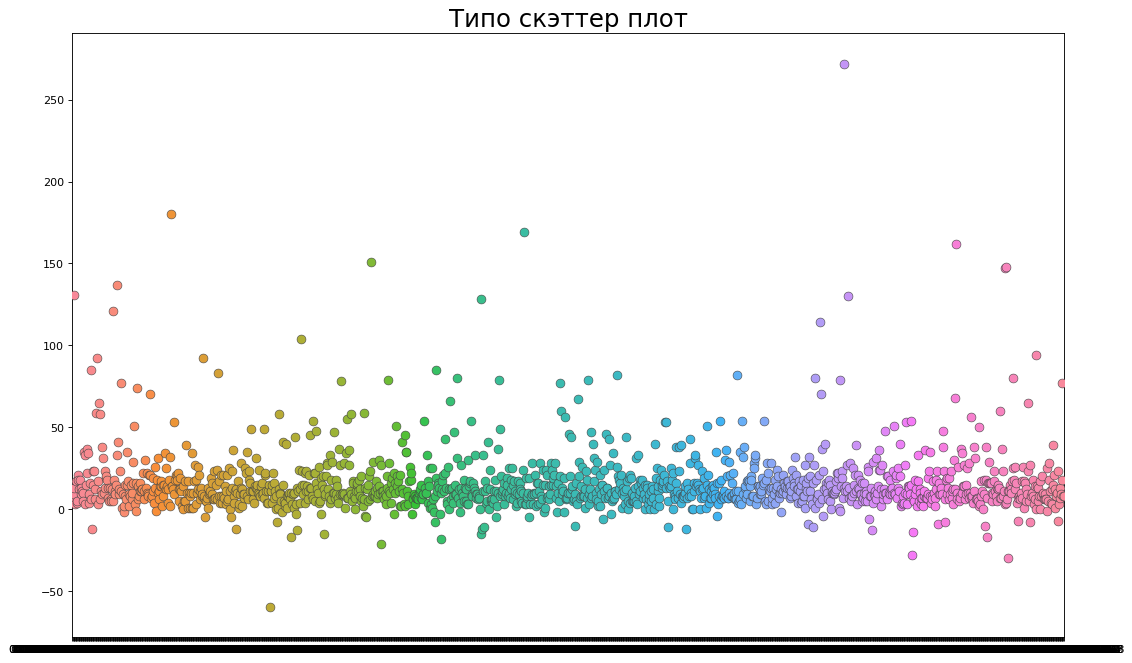

In [237]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(16,10), dpi= 80) 
sns.stripplot(kl, list_for_likes, jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Типо скэттер плот', fontsize=22)
plt.show()

In [239]:
#отсортированный словарь по месяцам: key - год-месяц, value - веса наших слов в статьях
sorted_dict = dict(sorted(dict_weights1.items()))
sorted_dict.keys()

dict_keys(['2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02'])

In [240]:
#лист с отсортированными датами
list_s_datami = []
for key in sorted_dict.keys():
    list_s_datami.append(key)
del list_s_datami[-1]

In [241]:
#лист с количеством статей по каждому месяцу
list_s_kolvom_statei = []
for value in sorted_dict.values():
    len1 = len(value)
    list_s_kolvom_statei.append(len1)

In [242]:
delta_y = []
for i in range(1, len(list_s_kolvom_statei)):
    delta = (list_s_kolvom_statei[i] - list_s_kolvom_statei[i-1])/(list_s_kolvom_statei[i-1])
    delta_y.append(delta)

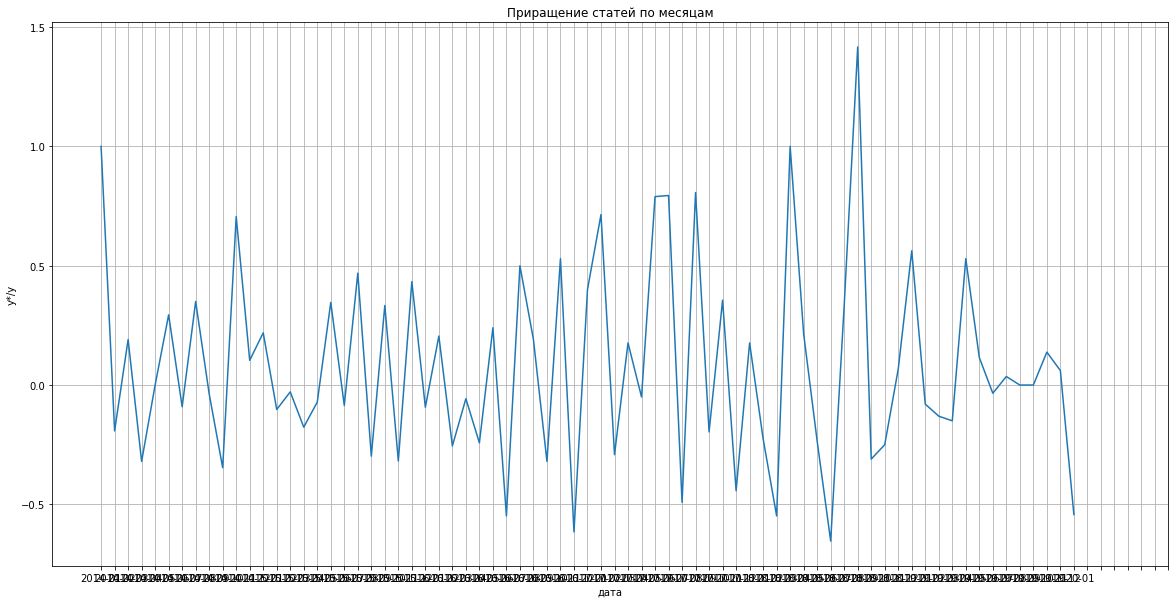

In [257]:
x = list_s_datami
y = delta_y
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(x, y)
ax.set(xlabel='дата', ylabel='y*/y',
       title='Приращение статей по месяцам')
plt.xticks(ticks=range(0,80,1))
ax.grid()
plt.show()

In [244]:
#теперь давайте попробуем создать словарь с key - месяц и value - среднее количество просмотров. Сначала для всех статей
dict_date_views = {}
for index, row in final['date'].iteritems():
    if dict_date_views.get(row) is None:
        dict_date_views[row]=list()
        dict_date_views[row].append(index)
    else:
        dict_date_views[row].append(index)
sorted_date_views = dict(sorted((dict_date_views.items())))
list_with_keys = []
for key in sorted_date_views.keys():
    list_with_keys.append(key)
views = []
for month in sorted_date_views.values():
    month_views = []
    for i in month:
        month_views.append(filik['views'][i])
    views.append(month_views)
sred_views = [] #средние просмотры по неупорядоченным месяцам
for element in views:
    a = np.mean(element)
    sred_views.append(a)
#словарь создался, только не такой. в sorted_date_views упорядоченно по дате ключи, а в values - номера статей. Я потом просто среднее считал


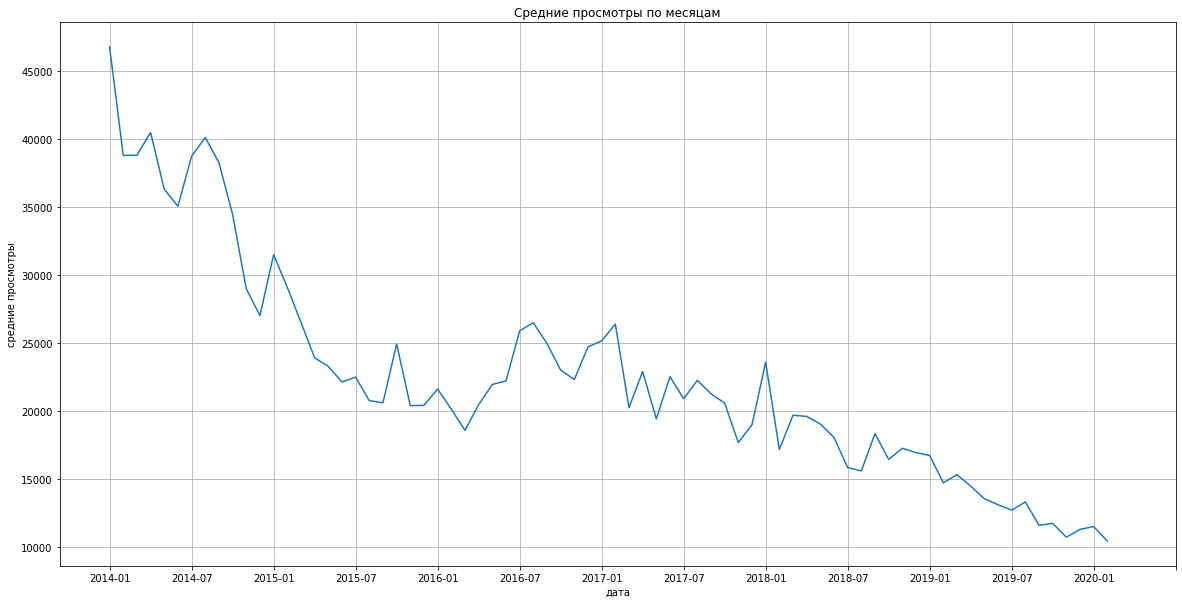

In [250]:
x = list_with_keys
y = sred_views
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(x, y)
ax.set(xlabel='дата', ylabel='средние просмотры',
       title='Средние просмотры по месяцам')
plt.xticks(ticks=range(0,80,6))
ax.grid()
plt.show()

In [264]:
#СРЕДНИЕ темы "прироста" просмотров статей - ну или убытия как хотите, минус возьмем
s1 = sred_views[0]
s2 = sred_views[-1]
g_sred = (s1/s2)**(1/74) - 1
g_sred

0.020449121786938917